In [1]:
from IPython.display import YouTubeVideo

# Aprendizado Supervisionado 

## Naive Bayes

Para falar do *Naive Bayes* é importante relembrar alguns aspectos da **Probabilidade**. A visão da probabilidade que precisamos ter é daquela que lida com eventos incertos sejam passados ou futuros. Calcular a probabilidade nada mais é do que calcular as chances de um evento específico dentre um conjunto maior de possibildades no qual aquele evento está inserido. 

Vamos entender um pouco de probabilidade no vídeo a seguir:

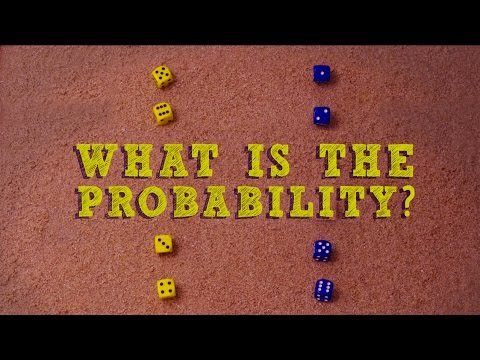

In [4]:
YouTubeVideo("Kgudt4PXs28")

Vamos ver um outro exemplo, o problema das 3 portas ou *Problema de Monty Hall*. 

A cena do filme [21 Quebrando a Banca](https://www.imdb.com/title/tt0478087/) ilustra esse problema:

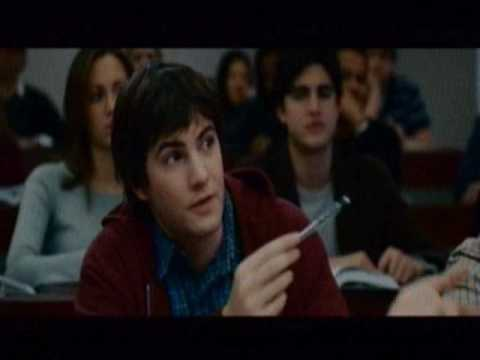

In [5]:
YouTubeVideo("DSbtIa8NM5E")

Vamos entender o problema:

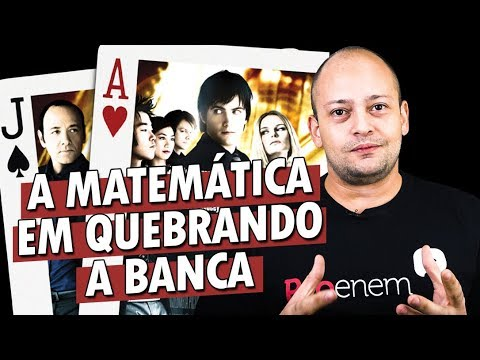

In [3]:
YouTubeVideo("x1zUc6XTRm8")

A explicação básica é que no início do game, o participante tinha 33% de chances de acertar a porta com o prêmio. No entanto, quando o apresentador abre uma porta que não tinha o prêmio e pergunta se o participante quer trocar de porta, ele aumenta as chances do partipante para 66%. Isso é probailidade, a pergunta do apresentador fez com que toda a probabilidade do problema mudasse. 

Vivemos em um mundo não-determinístico (ou seja, probabilístico) e o método que vamos estudar aqui se vale disso para fazer predições. Mais precisamente, tais métodos são baseados no chamado **Teorema de Bayes**. Segundo a [Wikipedia](https://pt.wikipedia.org/wiki/Teorema_de_Bayes), podemos definir o Teorema de Bayes como sendo: 

> Em teoria das probabilidades e estatística, o teorema de Bayes (alternativamente, a lei de Bayes ou a regra de Bayes) descreve a probabilidade de um evento, baseado em um conhecimento a priori que pode estar relacionado ao evento. O teorema mostra como alterar as probabilidades a priori tendo em vista novas evidências para obter probabilidades a posteriori.[1] Por exemplo, o teorema de Bayes pode ser aplicado ao jogo das três portas (também conhecido como problema de Monty Hall). [2]

> Uma das muitas aplicações do teorema de Bayes é a inferência bayesiana, uma abordagem particular da inferência estatística. Quando aplicado, as probabilidade envolvidas no teorema de Bayes podem ter diferentes interpretações de probabilidade. Com a interpretação bayesiana de probabilidade, o teorema expressa como a probabilidade de um evento (ou o grau de crença na ocorrência de um evento) deve ser alterada após considerar evidências sobre a ocorrência deste evento. A inferência bayesiana é fundamental para a estatística bayesiana.[3]

> O teorema de Bayes recebe este nome devido ao pastor e matemático inglês Thomas Bayes (1701 – 1761), que foi o primeiro a fornecer uma equação que permitiria que novas evidências atualizassem a probabilidade de um evento a partir do conhecimento a priori (ou a crença inicial na ocorrência de um evento). O teorema de Bayes foi mais tarde desenvolvido por Pierre-Simon Laplace, que foi o primeiro a publicar uma formulação moderna em 1812 em seu livro Teoria Analítica de Probabilidade, na tradução do francês. Harold Jeffreys colocou o algoritmo de Bayes e a formulação de Laplace em uma base axiomática. Jeffreys escreveu que "o teorema de Bayes é para a teoria da probabilidade o que o teorema de Pitágoras é para a geometria".[4]

Em outras palavras, o teorema de Bayes permite mudar o que sabemos para o que queremos inferir. Em outras palavras, o teorema de Bayes permite calcular a **probabilidade posteriori** (o que queremos infererir) a partir da **probabilidade a priori** (o que sabemos sobemos sobre o problema). Esse conceito é fundamental para o processo de aprendizagem do Naive Bayes. Em termos de fórmula, temos que:

$P(A | B) = \frac{P(A) * P(B|A)}{P(A)*P(B|A) + P(A^c)*P(B|A^c)}$, onde $P(A)$ e $P(A^c)$ são as propriedades a priori, que é o que sabíamos sobre o problema antes que o evento $B$ acontecesse. Já $P(A|B)$ é a probabilidade posteriori que deseja-se calcular (podia ser também $P(A^c|B)$). 

## Inferência Bayesiana

Para entendermos como podemos usar o *Teorema de Bayes* para fazer a inferência, vamos trabalhar com o seguinte exemplo. Deseja, inferir se dado uma determinada condição climática, vai jogar ou não tênis. Já vimos esse exemplo no nas árvores de decisão. 

Considere a tabela a seguir:

In [6]:
from sklearn import tree
import pandas as pd

data = pd.read_csv('http://www.data2learning.com/machinelearning/datasets/exemplo_jogar.csv')

data

,Panorama,Temperatura,Umidade,Vento,Jogar
0,Ensolarado,Quente,Alta,Fraco,Não
1,Ensolarado,Quente,Alta,Forte,Não
2,Nublado,Quente,Alta,Fraco,Sim
3,Chuvoso,Intermediária,Alta,Fraco,Sim
4,Chuvoso,Fria,Normal,Fraco,Sim
5,Chuvoso,Fria,Normal,Forte,Não
6,Nublado,Fria,Normal,Forte,Sim
7,Ensolarado,Intermediária,Alta,Fraco,Não
8,Ensolarado,Fria,Normal,Fraco,Sim
9,Chuvoso,Intermediária,Normal,Fraco,Sim


Para demonstrar, vamos trabalhar só com o atributo **Panorama**. Depois fazemos a analogia para tabela completa. 

In [8]:
from sklearn import tree
import pandas as pd

data = pd.read_csv('http://www.data2learning.com/machinelearning/datasets/exemplo_jogar.csv')

data = data[['Panorama', 'Jogar']]
data

,Panorama,Jogar
0,Ensolarado,Não
1,Ensolarado,Não
2,Nublado,Sim
3,Chuvoso,Sim
4,Chuvoso,Sim
5,Chuvoso,Não
6,Nublado,Sim
7,Ensolarado,Não
8,Ensolarado,Sim
9,Chuvoso,Sim
